In [1]:
import pandas

In [2]:
AmesHousing = pandas.read_excel('../data/AmesHousing.xls')

In [3]:
cd ..

D:\UofMemphis\Fall-18\COMP6993\DSP-COMP6993


In [4]:
from libpy import NS_dp

In [5]:
df = NS_dp.clean_Ames_Housing(AmesHousing)

In [6]:
from libpy import FS

In [7]:
from sklearn.utils import shuffle

In [8]:
X_train, y_train, X_test, y_test = FS.feature_select(df, k=100)

In [9]:
X_train.sample(10)

,Bsmt Half Bath,Fireplaces,3Ssn Porch,Mo Sold,MS SubClass,MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RM,...,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Partial,Lot Shape,Land Slope,Bsmt Qual,BsmtFin Type 1,Kitchen Qual,Heating QC,Garage Finish
2524,0.0,0,0,8,60,0,0,0,0,0,...,0,0,1,3.0,0.0,2.0,2.0,2.0,0.0,1.0
132,0.0,0,0,5,20,0,0,0,0,0,...,0,0,0,0.0,0.0,4.0,1.0,4.0,4.0,1.0
1674,0.0,2,0,7,60,0,0,0,0,0,...,0,0,0,0.0,0.0,4.0,3.0,2.0,4.0,1.0
432,0.0,0,0,7,160,0,0,0,0,0,...,0,0,0,3.0,0.0,2.0,2.0,2.0,0.0,1.0
2479,0.0,2,0,5,80,0,0,0,0,0,...,0,0,0,0.0,0.0,4.0,3.0,4.0,0.0,1.0
1648,0.0,1,0,8,60,0,1,0,0,0,...,0,0,1,3.0,0.0,2.0,2.0,0.0,0.0,0.0
207,0.0,2,0,3,60,0,0,0,0,0,...,0,0,0,3.0,0.0,4.0,4.0,4.0,0.0,2.0
1129,0.0,0,0,4,50,0,0,0,0,0,...,0,0,0,3.0,0.0,4.0,1.0,4.0,4.0,2.0
956,0.0,0,0,4,160,0,0,0,0,1,...,0,0,0,3.0,0.0,4.0,3.0,4.0,2.0,2.0
176,0.0,0,0,6,70,0,0,0,0,1,...,0,0,0,3.0,0.0,1.0,5.0,4.0,2.0,2.0


In [10]:
from sklearn import linear_model

In [11]:
from libpy import CV

In [12]:
score, model_LR = CV.validate_model( linear_model.LinearRegression(), X_train, y_train )

score

0.704679569703941

In [13]:
score, model_R = CV.validate_model( linear_model.Ridge (alpha = .5), X_train, y_train )

score

0.721923352402009

In [14]:
score, model_L = CV.validate_model( linear_model.Lasso(alpha = 0.1), X_train, y_train )

score

E:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.7053380956271557

In [15]:
predictions = {}

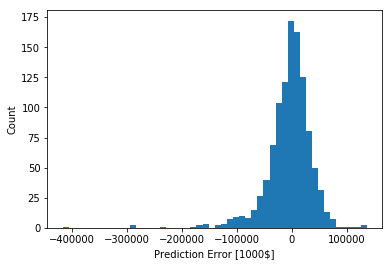

In [16]:
y_pred = model_L.predict( X_test ).flatten()

prediction = []
prediction.append( y_test.values.flatten() )
prediction.append(y_pred)
predictions["Lasso"] = prediction 

CV.plot_predict_error(y_test, y_pred)

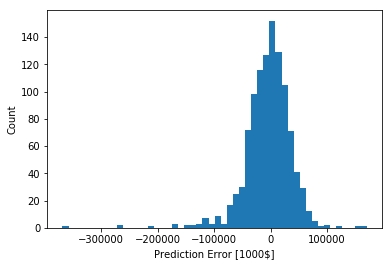

In [17]:
y_pred = model_LR.predict( X_test ).flatten()

prediction = []
prediction.append( y_test.values.flatten() )
prediction.append(y_pred)
predictions["LinearRegression"] = prediction 

CV.plot_predict_error(y_test, y_pred)

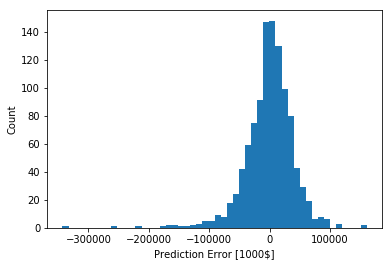

In [18]:
y_pred = model_R.predict( X_test ).flatten()

prediction = []
prediction.append( y_test.values.flatten() )
prediction.append(y_pred)
predictions["Ridge"] = prediction 

CV.plot_predict_error(y_test, y_pred)

In [19]:
bf = CV.pack_data(predictions)

In [20]:
bf

,y_test,Lasso_y_pred,LinearRegression_y_pred,Ridge_y_pred
0,149500,-25803.510193,-22561.433120,-29661.164863
1,189500,-20543.009367,-27894.949792,-20310.581870
2,146000,27238.136628,35205.116023,22068.670562
3,217000,-7718.027761,-13333.603470,-21391.450709
4,136000,29713.371929,26098.136125,36123.794804
5,116000,4519.462804,-1738.921357,3227.705340
6,155000,5486.525783,-5653.215952,3893.582818
7,126000,-20401.246422,-3944.673959,-15940.860704
8,162000,-6971.036709,-2499.845765,6075.062107
9,160000,26992.265643,27602.173326,31215.935958


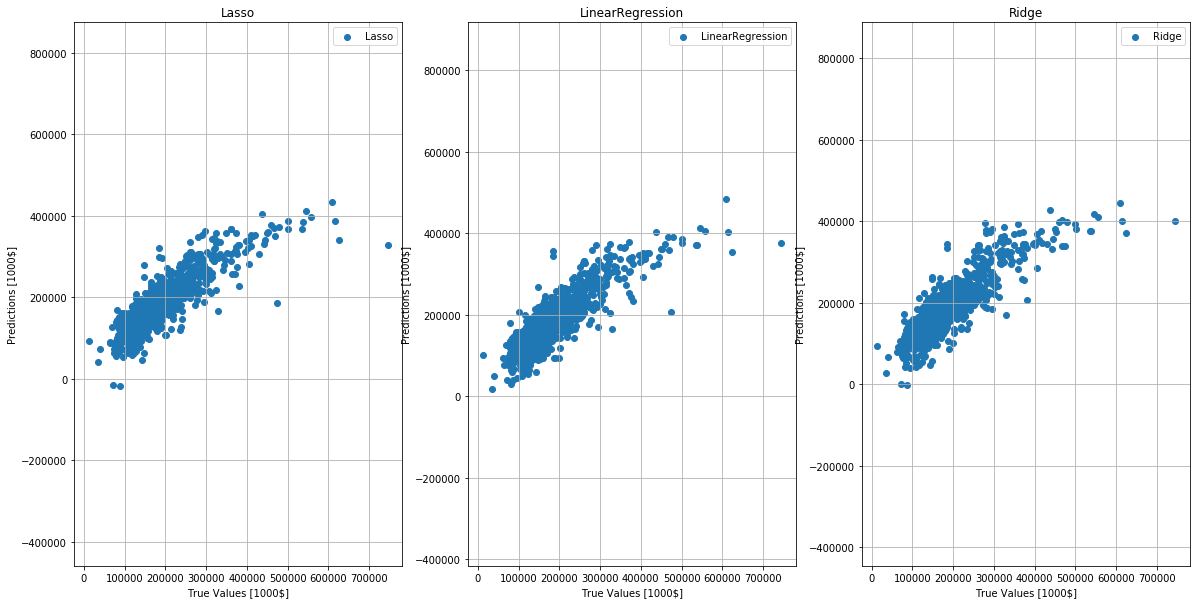

In [21]:
CV.plot_predict(predictions)